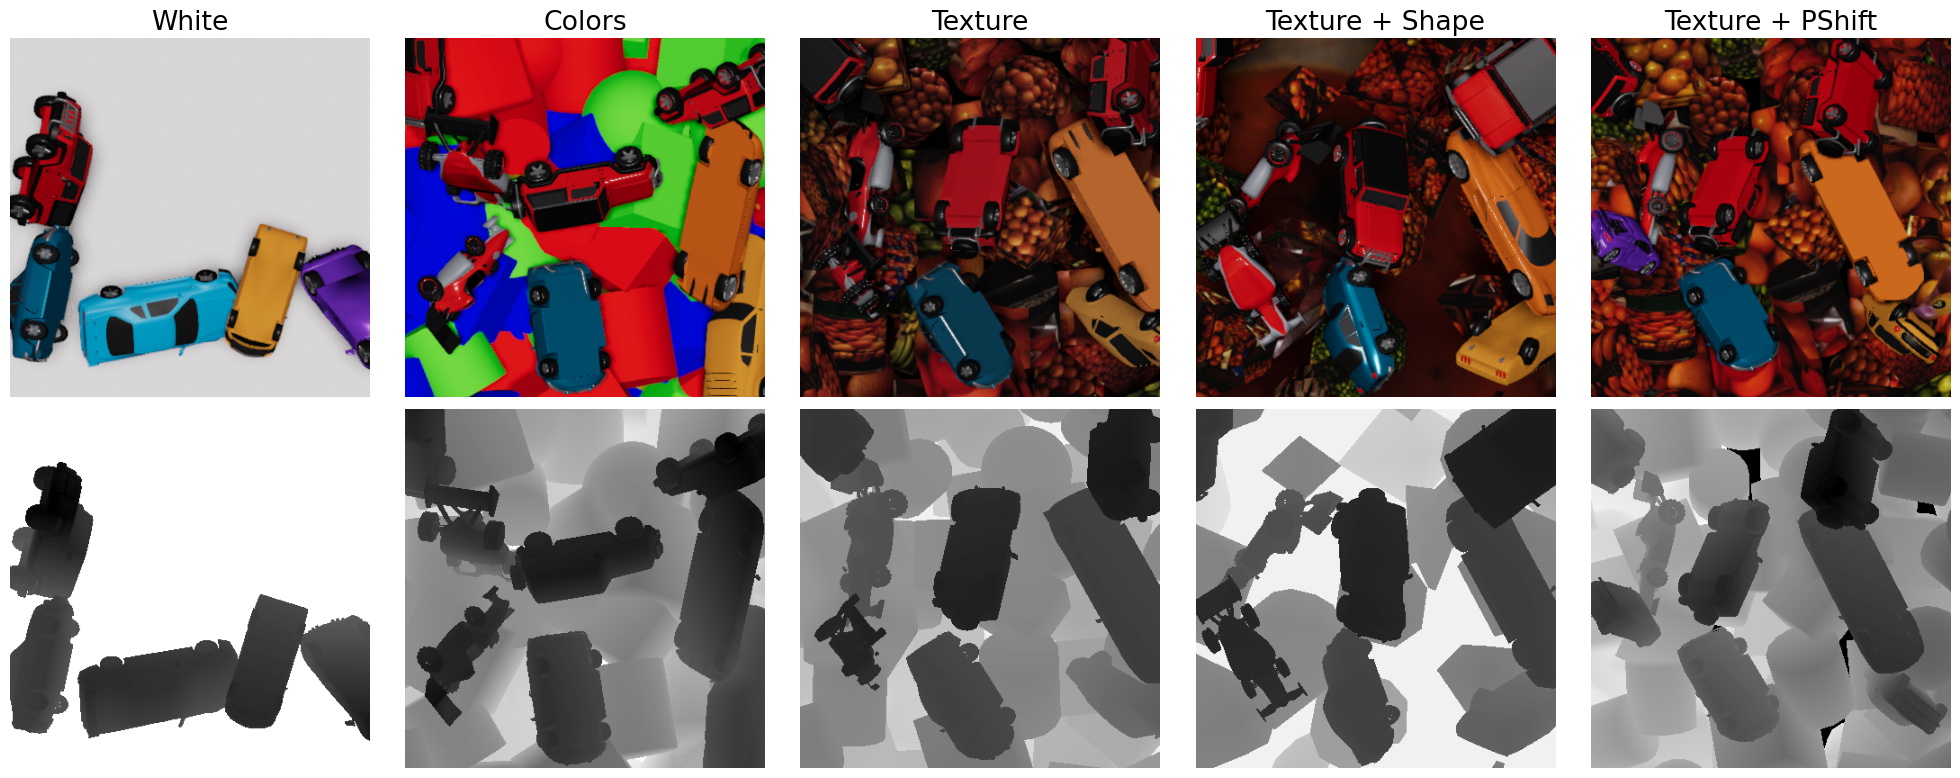

In [6]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

# code\UsefullnessOfDepth\datasets\foreground_background\SynthDet_cars_foreground_background\RGB\test_0.png
# ..                     \datasets\foreground_background\SynthDet_cars_foreground_background\RGB\test_0.png
# fgbg_rgb_path = r"..\datasets\foreground_background\SynthDet_cars_foreground_background"
# fgbg_diff_color_path = r"..\datasets\foreground_background\SynthDet_carse_foreground_background_diff_color"
# fgbg_diff_white_path = r"..\datasets\foreground_background\SynthDet_carse_foreground_background_diff_white"

fgbg_dir_path = r"..\datasets\test_suite_foreground_background"

names = ["White", "Colors", "Texture", "Texture + Shape", "Texture + PShift"]
exclude = ["texture_flat_far", "white_flat_far"]

depth_folder = "Depth"
RGB_folder = "RGB"
test_image = "test_{0}.png"

fig, ax = plt.subplots(2, 5, figsize=(20, 8))

i = 0
for dir in os.listdir(fgbg_dir_path):
    if any(ex in dir for ex in exclude): continue
    
    path = os.path.join(fgbg_dir_path, dir)
    
    depth_image = cv2.imread(os.path.join(path, depth_folder, test_image.format(0)), cv2.IMREAD_UNCHANGED)
    rgb_image = cv2.imread(os.path.join(path, RGB_folder, test_image.format(0)), cv2.IMREAD_UNCHANGED)

    ax[0, i].imshow(cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB))
    ax[0, i].axis("off")
    plt.rcParams.update({'font.size': 16})
    ax[0, i].set_title(names[i])

    ax[1, i].imshow(depth_image, cmap="gray", vmin=0, vmax=255)
    ax[1, i].axis("off")

    i += 1

plt.tight_layout()
plt.show()


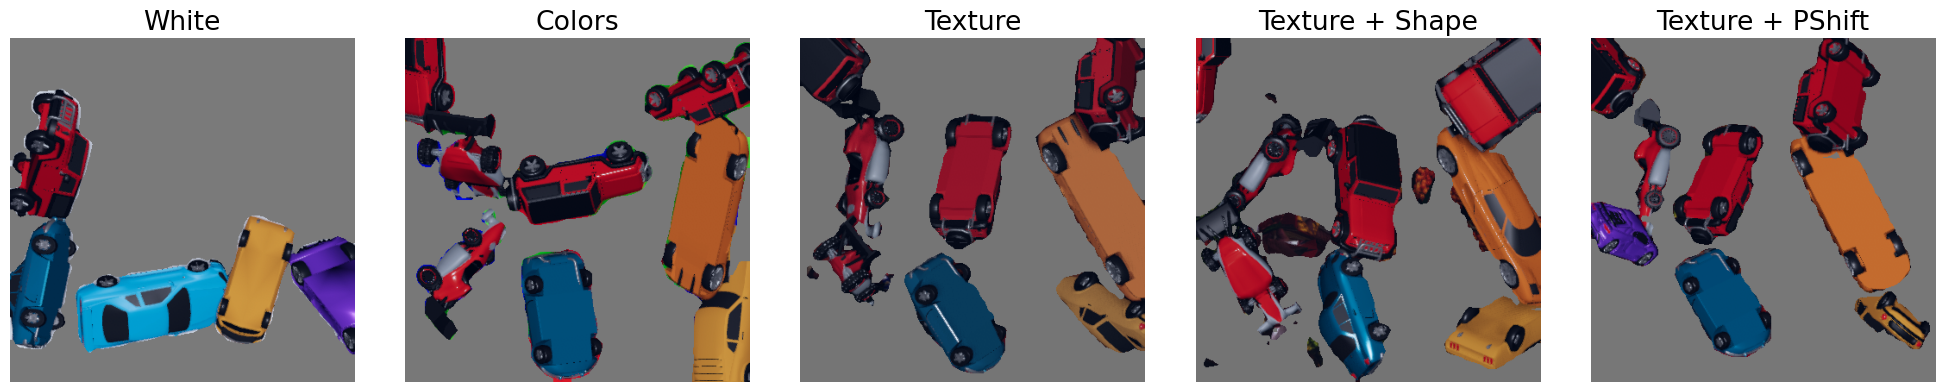

In [8]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

fgbg_dir_path = r"..\datasets\test_suite_foreground_background"

names = ["White", "Colors", "Texture", "Texture + Shape", "Texture + PShift"]
exclude = ["texture_flat_far", "white_flat_far"]

background_folder = "background_removed"
test_image = "test_{0}.png"

fig, ax = plt.subplots(1, 5, figsize=(20, 4))

i = 0
for dir in os.listdir(fgbg_dir_path):
    if any(ex in dir for ex in exclude): continue
    
    path = os.path.join(fgbg_dir_path, dir)
    
    rgb_image = cv2.imread(os.path.join(path, background_folder, test_image.format(0)), cv2.IMREAD_UNCHANGED)

    ax[i].imshow(cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB))
    ax[i].axis("off")
    plt.rcParams.update({'font.size': 16})
    ax[i].set_title(names[i])

    i += 1

plt.tight_layout()
plt.show()

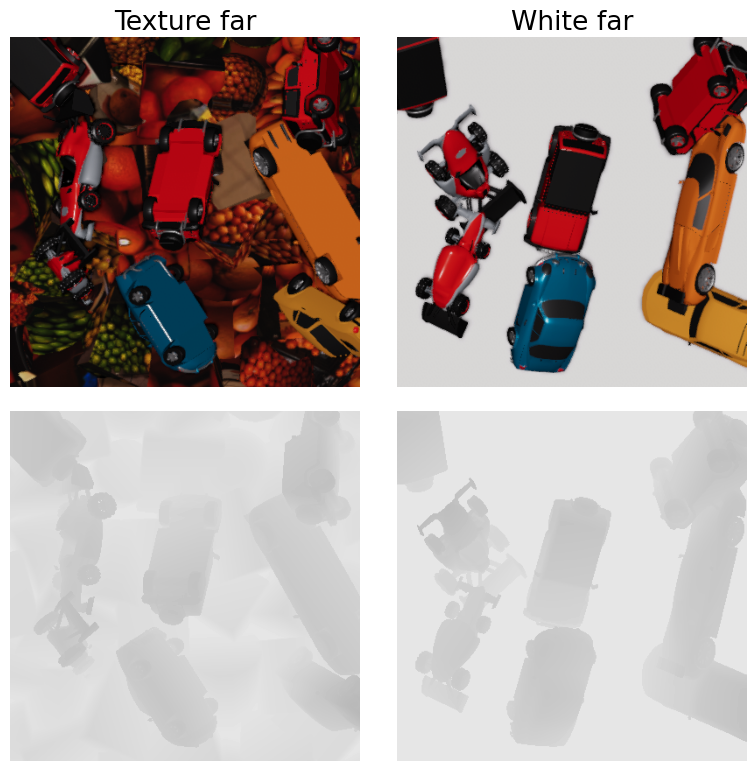

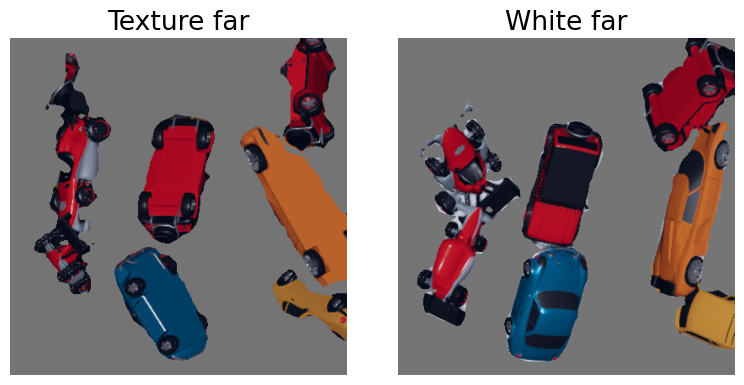

In [19]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

fgbg_dir_path = r"..\datasets\test_suite_foreground_background"

names = ["Texture far", "White far"]
include = ["texture_flat_far", "white_flat_far"]

depth_folder = "Depth"
RGB_folder = "RGB"
test_image = "test_{0}.png"



# dataset_index = 1

for dataset_index in range(1):
    fig, ax = plt.subplots(2, 2, figsize=(8, 8))

    i = 0
    for dir in os.listdir(fgbg_dir_path):
        if not any(ex in dir for ex in include): continue
        
        path = os.path.join(fgbg_dir_path, dir)
        
        depth_image = cv2.imread(os.path.join(path, depth_folder, test_image.format(dataset_index)), cv2.IMREAD_UNCHANGED)
        rgb_image = cv2.imread(os.path.join(path, RGB_folder, test_image.format(dataset_index)), cv2.IMREAD_UNCHANGED)

        ax[0, i].imshow(cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB))
        ax[0, i].axis("off")
        plt.rcParams.update({'font.size': 16})
        ax[0, i].set_title(names[i])

        ax[1, i].imshow(depth_image, cmap="gray", vmin=0, vmax=255)
        ax[1, i].axis("off")

        i += 1

    plt.tight_layout()
    plt.show()

    background_folder = "background_removed"
    test_image = "test_{0}.png"

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))

    i = 0
    for dir in os.listdir(fgbg_dir_path):
        if not any(ex in dir for ex in include): continue
        
        path = os.path.join(fgbg_dir_path, dir)
        
        rgb_image = cv2.imread(os.path.join(path, background_folder, test_image.format(dataset_index)), cv2.IMREAD_UNCHANGED)

        ax[i].imshow(cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB))
        ax[i].axis("off")
        plt.rcParams.update({'font.size': 16})
        ax[i].set_title(names[i])

        i += 1

    plt.tight_layout()
    plt.show()

..\datasets\test_suite_fgbg_large_spacing_appearance\SynthDet_fgbg_1_white_large_spacing\Depth\test_0.png
..\datasets\test_suite_fgbg_large_spacing_appearance\SynthDet_fgbg_2_color_large_spacing\Depth\test_0.png
..\datasets\test_suite_fgbg_large_spacing_appearance\SynthDet_fgbg_3_texture_large_spacing\Depth\test_0.png


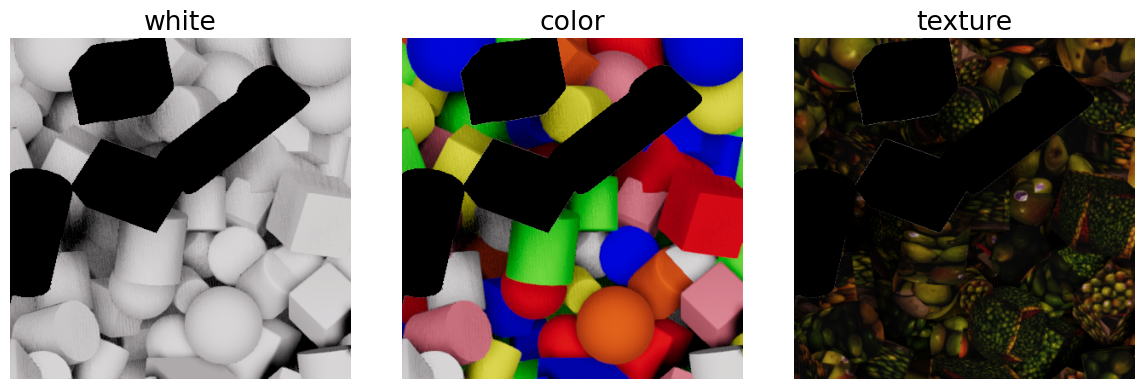

[43274.05657881313, 64468.52227306412, 78029.45927066238]
white colorfulness: 43.27405657881313
white entropy: 2.74209087747324
white RMS noise: 4.325136335116512
color colorfulness: 64.46852227306412
color entropy: 2.9115856398924596
color RMS noise: 3.9140558986915295
texture colorfulness: 78.02945927066239
texture entropy: 2.437953016440953
texture RMS noise: 3.8469792477519182


In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import skimage.measure

fgbg_dir_path = r"..\datasets\test_suite_fgbg_large_spacing_appearance"

names = ["white", "color", "texture"]
exclude = ["flat"]

depth_folder = "Depth"
RGB_folder = "RGB"
label_folder = "Labels"
test_image = "test_{0}.png"

def calculate_colorfulness(image):
    (B, G, R) = cv2.split(image)
    rg = np.absolute(R - G)
    yb = np.absolute(0.5 * (R + G) - B)
    std_root = np.sqrt((np.std(rg) ** 2) + (np.std(yb) ** 2))
    mean_root = np.sqrt((np.mean(rg) ** 2) + (np.mean(yb) ** 2))
    return std_root + (0.3 * mean_root)

first_folder = os.listdir(fgbg_dir_path)[0]

dataset_length = len(os.listdir(os.path.join(fgbg_dir_path, first_folder, RGB_folder)))

mean_colorfulness = [0, 0, 0]
mean_entropy = [0, 0, 0]
mean_rms_noise = [0, 0, 0]

for j in range(dataset_length):
    i = 0
    if j == 0:
        fig, ax = plt.subplots(1, 3, figsize=(12, 4))
    for dir in os.listdir(fgbg_dir_path):
        if any(ex in dir for ex in exclude): continue
        
        path = os.path.join(fgbg_dir_path, dir)
        if j == 0:
            print(os.path.join(path, depth_folder, test_image.format(j)))
        if not os.path.exists(os.path.join(path, depth_folder, test_image.format(j))): continue
        
        depth_image = cv2.imread(os.path.join(path, depth_folder, test_image.format(j)), cv2.IMREAD_GRAYSCALE)
        rgb_image = cv2.imread(os.path.join(path, RGB_folder, test_image.format(j)), cv2.COLOR_BGR2RGB)
        rgb_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB)
        label_image = cv2.imread(os.path.join(path, label_folder, test_image.format(j)), cv2.IMREAD_UNCHANGED)

        foreground_only = label_image != 0
        rgb_filtered = rgb_image.copy()
        rgb_filtered[foreground_only] = 0

        entropy = skimage.measure.shannon_entropy(cv2.cvtColor(rgb_filtered, cv2.COLOR_RGB2GRAY))
        # print(f"{names[i]} entropy: {entropy}")

        RMS_noise = np.sqrt(np.mean(np.square(rgb_filtered)))
        
        colorfulness = calculate_colorfulness(rgb_filtered)
        # print(f"{names[i]} colorfulness: {colorfulness}")

        if j == 0:
            ax[i].imshow(rgb_filtered)
            ax[i].axis("off")
            plt.rcParams.update({'font.size': 16})
            ax[i].set_title(names[i])

        mean_colorfulness[i] += colorfulness
        mean_entropy[i] += entropy
        mean_rms_noise[i] += RMS_noise

        i += 1

    if j == 0:
        plt.tight_layout()
        plt.show()

print(mean_colorfulness)
i = 0
for dir in os.listdir(fgbg_dir_path):
    if any(ex in dir for ex in exclude): continue
    
    print(f"{names[i]} colorfulness: {mean_colorfulness[i] / dataset_length}")
    print(f"{names[i]} entropy: {mean_entropy[i] / dataset_length}")
    print(f"{names[i]} RMS noise: {mean_rms_noise[i] / dataset_length}")

    i += 1


In [2]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import skimage.measure

fgbg_dir_path = r"..\datasets\test_suite_fgbg_large_spacing_appearance"

names = ["white", "color", "texture"]
exclude = ["flat"]

depth_folder = "Depth"
RGB_folder = "RGB"
label_folder = "Labels"
test_image = "test_{0}.png"
gradient_magnitudes = []
for x in range(len(names)):
    gradient_magnitudes.append([])

for j in range(500):
    i = 0
    for dir in os.listdir(fgbg_dir_path):
        if any(ex in dir for ex in exclude): continue
        
        path = os.path.join(fgbg_dir_path, dir)
        
        # depth_image = cv2.imread(os.path.join(path, depth_folder, test_image.format(j)), cv2.IMREAD_GRAYSCALE)
        rgb_image = cv2.imread(os.path.join(path, RGB_folder, test_image.format(j)), cv2.COLOR_BGR2RGB)
        if rgb_image is None: continue
        rgb_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB)
        label_image = cv2.imread(os.path.join(path, label_folder, test_image.format(j)), cv2.IMREAD_UNCHANGED)

        foreground_only = label_image != 0
        rgb_filtered = rgb_image.copy()
        rgb_filtered[foreground_only] = 0

        entropy = skimage.measure.shannon_entropy(cv2.cvtColor(rgb_filtered, cv2.COLOR_RGB2GRAY))
        gradient_magnitudes[i].append(entropy)

        i += 1

for i, name in enumerate(names):
    print(f"{name} mean: {np.mean(gradient_magnitudes[i])}")
    print(f"{name} std: {np.std(gradient_magnitudes[i])}")

Orange flat mean: 2.615777918730217
Orange flat std: 0.3309363081977115
Orange_objects mean: 4.249681797752312
Orange_objects std: 0.8053048012204141
Orange_objects_texture mean: 4.65490073969124
Orange_objects_texture std: 0.9793840915089594
Orange_texture mean: 4.764577796831781
Orange_texture std: 1.0165620709296384


In [2]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import skimage.measure

def show_gradient_magnitude_background(
        fgbg_dir_path: str,
        names: list,
        exclude: list,
        depth_folder: str="Depth",
        RGB_folder: str="RGB",
        label_folder: str="labels",
):
    gradient_magnitudes = []
    entropy_values = []
    for x in range(len(names)):
        gradient_magnitudes.append([])
        entropy_values.append([])

    i = 0
    for dir in os.listdir(fgbg_dir_path):
        if any(ex in dir for ex in exclude): continue
        for filename in [f for f in os.listdir(os.path.join(fgbg_dir_path, dir, RGB_folder)) if f.startswith("test")]:
            path = os.path.join(fgbg_dir_path, dir)
            
            # depth_image = cv2.imread(os.path.join(path, depth_folder, test_image.format(j)), cv2.IMREAD_GRAYSCALE)
            rgb_image = cv2.imread(os.path.join(path, RGB_folder, filename), cv2.COLOR_BGR2RGB)
            if rgb_image is None: continue
            rgb_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB)
            label_image = cv2.imread(os.path.join(path, label_folder, filename), cv2.IMREAD_UNCHANGED)

            foreground_only = label_image != 0
            rgb_filtered = rgb_image.copy()
            rgb_filtered[foreground_only] = 0

            if "101" in filename:
                import matplotlib.pyplot as plt
                plt.imshow(rgb_filtered)
                plt.show()

            # Compute the gradients using Sobel filter
            sobel_x = cv2.Sobel(rgb_filtered, cv2.CV_64F, 1, 0, ksize=3)
            sobel_y = cv2.Sobel(rgb_filtered, cv2.CV_64F, 0, 1, ksize=3)
            gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

            # Calculate the average gradient magnitude
            avg_gradient_magnitude = np.mean(gradient_magnitude)
            gradient_magnitudes[i].append(avg_gradient_magnitude)

            entropy = skimage.measure.shannon_entropy(cv2.cvtColor(rgb_filtered, cv2.COLOR_RGB2GRAY))
            entropy_values[i].append(entropy)

        i += 1

    for i, name in enumerate(names):
        print(f"{name} mean: {np.mean(gradient_magnitudes[i])}")
        print(f"{name} std: {np.std(gradient_magnitudes[i])}")
        print(f"{name} entropy mean: {np.mean(entropy_values[i])}")
        print(f"{name} entropy std: {np.std(entropy_values[i])}")

fgbg_dir_path = r"..\datasets\test_suite_fgbg"

names = ["Orange flat", "Orange_objects", "Orange_objects_texture", "Orange_texture"]
exclude = ["green"]

depth_folder = "Depth"
RGB_folder = "RGB"
label_folder = "labels"

# show_gradient_magnitude_background(fgbg_dir_path, names, exclude, depth_folder, RGB_folder, label_folder)

['SynthDet_fgbg_1_white_large_spacing', 'SynthDet_fgbg_2_color_large_spacing', 'SynthDet_fgbg_3_texture_large_spacing']


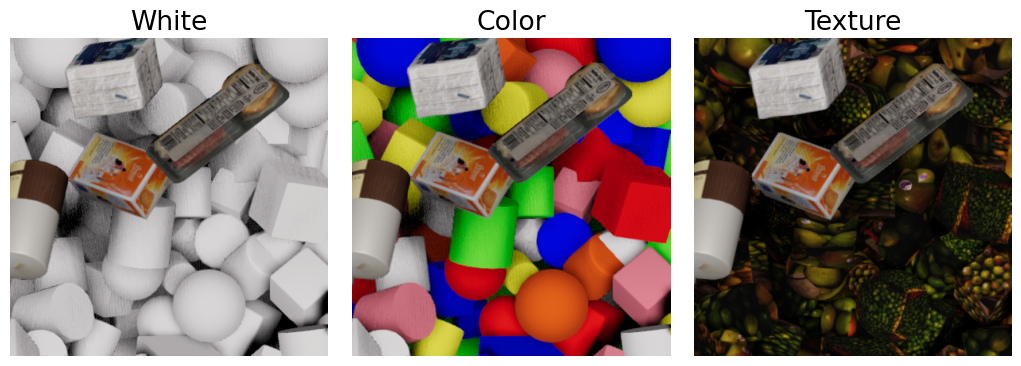

In [7]:


fgbg_large_spacing_dir_path = r"..\datasets\test_suite_fgbg_large_spacing_appearance"
names = ["White", "Color", "Texture"]
exclude = ["flat"]

# show_gradient_magnitude_background(fgbg_large_spacing_dir_path, names, exclude)

test_image = "test_{0}.png"

# fig, ax = plt.subplots(3, 3, figsize=(9,9))
fig, ax = plt.subplots(1, 3, figsize=(10.5, 4))

dirs = [dir for dir in os.listdir(fgbg_large_spacing_dir_path) if not any(ex in dir for ex in exclude)]
print(dirs)

plt.rcParams.update({'font.size': 16})

for i, dir in enumerate(dirs):
    # if any(ex in dir for ex in exclude): continue
    # print(dir, exclude[0] in dir)
    path = os.path.join(fgbg_large_spacing_dir_path, dir)
    rgb_image = cv2.imread(os.path.join(path, RGB_folder, test_image.format(0)), cv2.IMREAD_UNCHANGED)
    depth_image = cv2.imread(os.path.join(path, depth_folder, test_image.format(0)), cv2.IMREAD_UNCHANGED)
    label_image = cv2.imread(os.path.join(path, label_folder, test_image.format(0)), cv2.IMREAD_UNCHANGED)

    foreground_only = label_image > 0
    image_foreground = rgb_image.copy()
    image_foreground[~foreground_only] = 0

    # ax[i, 0].imshow(cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB))
    # ax[i, 0].axis("off")
    # if i == 0:
    #     ax[i, 0].set_title("RGB")

    # ax[i, 1].imshow(depth_image, cmap="gray", vmin=0, vmax=255)
    # ax[i, 1].axis("off")
    # if i == 0:
    #     ax[i, 1].set_title("Depth")

    # ax[i, 2].imshow(cv2.cvtColor(image_foreground, cv2.COLOR_BGR2RGB))
    # ax[i, 2].axis("off")
    # if i == 0:
    #     ax[i, 2].set_title("Foreground only")

    ax[i].imshow(cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB))
    ax[i].axis("off")
    ax[i].set_title(names[i])

plt.tight_layout()
plt.show()

    

{'SynthDet_fgbg_1_white_large_spacing': {'SynthDet_fgbg_0_white_flat': {'RGB': 86.261,
                                                                        'RGB-D': 92.937,
                                                                        'RGB-D Aux': 92.711},
                                         'SynthDet_fgbg_1_white_large_spacing': {'RGB': 88.497,
                                                                                 'RGB-D': 94.059,
                                                                                 'RGB-D Aux': 93.738},
                                         'SynthDet_fgbg_2_color_large_spacing': {'RGB': 54.929,
                                                                                 'RGB-D': 83.029,
                                                                                 'RGB-D Aux': 84.606},
                                         'SynthDet_fgbg_3_texture_large_spacing': {'RGB': 54.222,
                                      

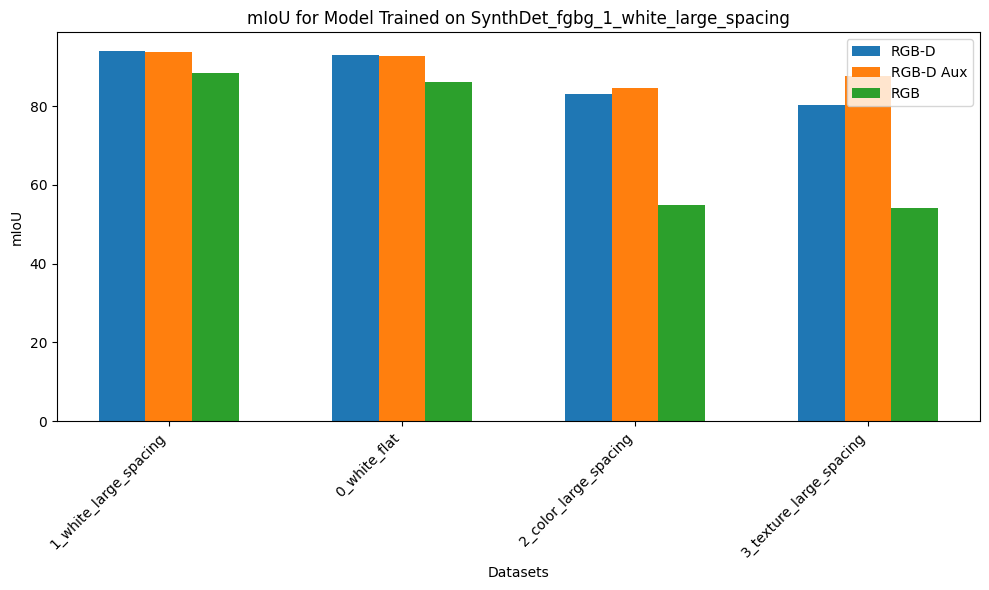

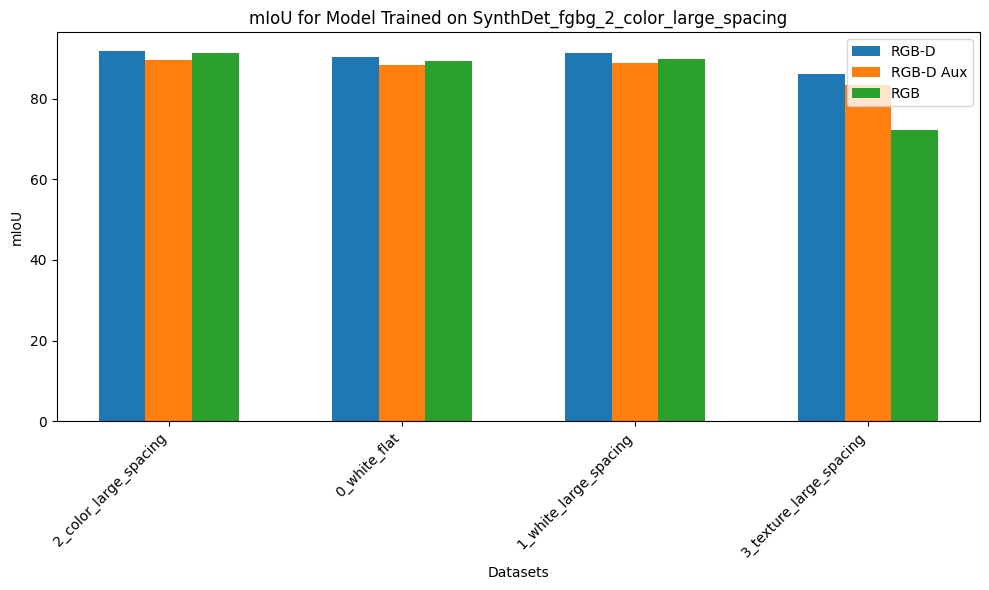

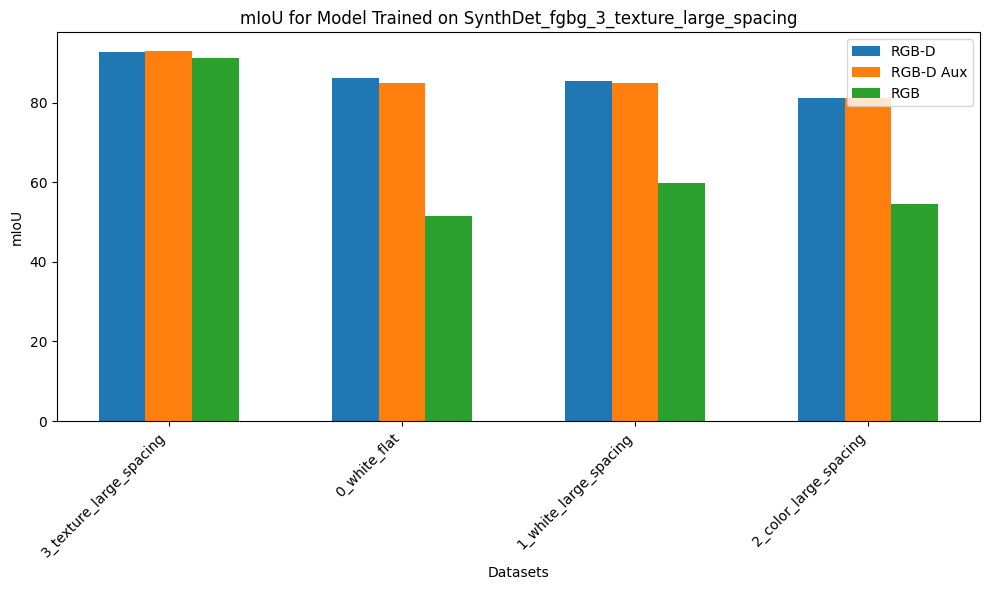

In [1]:
import re
import matplotlib.pyplot as plt

# Input data as a string
input_file = r"G:\mscPascalBenschop\code\UsefullnessOfDepth\checkpoints_fgbg_spacing\log_20240602_130826.txt"
with open(input_file, "r") as file:
    input_data = file.read()

def parse_DFormer_input_data(data):
    models_data = {}
    current_model = None
    current_dataset = None
    
    # Split the input data into models trained
    for model_trained_data in data.split("Model trained on dataset: ")[1:]:
        if not model_trained_data:
            continue
        
        # Dataset name is the first line of the model trained data
        model_lines = model_trained_data.split("\n")
        model_name = model_lines[0].strip()
        models_data[model_name] = {}

        # Split the model trained data into the different datasets
        for testing_data in model_trained_data.split("Dataset: "):
            if not testing_data:
                continue
            
            # Dataset name is the first line of the testing data
            dataset_lines = testing_data.split("\n")
            dataset_name = dataset_lines[0].strip()
            models_data[model_name][dataset_name] = {}

            

            # Extract the mIoU values from the testing data
            for line in dataset_lines[1:]:
                if "RGB-D Aux mIoU" in line:
                    models_data[model_name][dataset_name]["RGB-D Aux"] = float(re.search(r"\d+\.\d+", line).group())
                elif "RGB-D mIoU" in line:
                    models_data[model_name][dataset_name]["RGB-D"] = float(re.search(r"\d+\.\d+", line).group())
                elif "RGB mIoU" in line:
                    models_data[model_name][dataset_name]["RGB"] = float(re.search(r"\d+\.\d+", line).group())
    
    return models_data

def plot_data(model_data):
    for model, data in model_data.items():
        datasets = list(data.keys())
        metrics = ['RGB-D', 'RGB-D Aux', 'RGB']
        plt.figure(figsize=(10, 6))

        num_datasets = len(datasets)
        num_metrics = len(metrics)

        # Set up the bar width and positions
        bar_width = 0.2
        index = range(num_datasets)
        
        # Plot each metric as a separate bar
        for i, metric in enumerate(metrics):
            values = [data[dataset].get(metric, 0) for dataset in datasets]
            bar_positions = [pos + i * bar_width for pos in index]
            plt.bar(bar_positions, values, width=bar_width, label=metric)
        
        # Adjust the x-axis to have the dataset names centered under the group of bars
        mid_positions = [pos + bar_width * (num_metrics - 1) / 2 for pos in index]
        stripped_dataset_names = [dataset.split("SynthDet_fgbg_")[-1] for dataset in datasets]
        plt.xticks(mid_positions, stripped_dataset_names, rotation=45, ha='right')

        plt.xlabel('Datasets')
        plt.ylabel('mIoU')
        plt.title(f'mIoU for Model Trained on {model}')
        plt.legend()
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

# Parse the input data
data = parse_DFormer_input_data(input_data)

import pprint
pprint.pprint(data)

# Plot the data
plot_data(data)

{'SynthDet_fgbg_1_white_large_spacing': {'SynthDet_fgbg_1_white_large_spacing': {'RGB': [92.35,
                                                                                         90.869,
                                                                                         94.392,
                                                                                         66.035,
                                                                                         92.134,
                                                                                         90.48],
                                                                                 'RGB-D': [93.14,
                                                                                           94.059,
                                                                                           92.507,
                                                                                           94.931,
                        

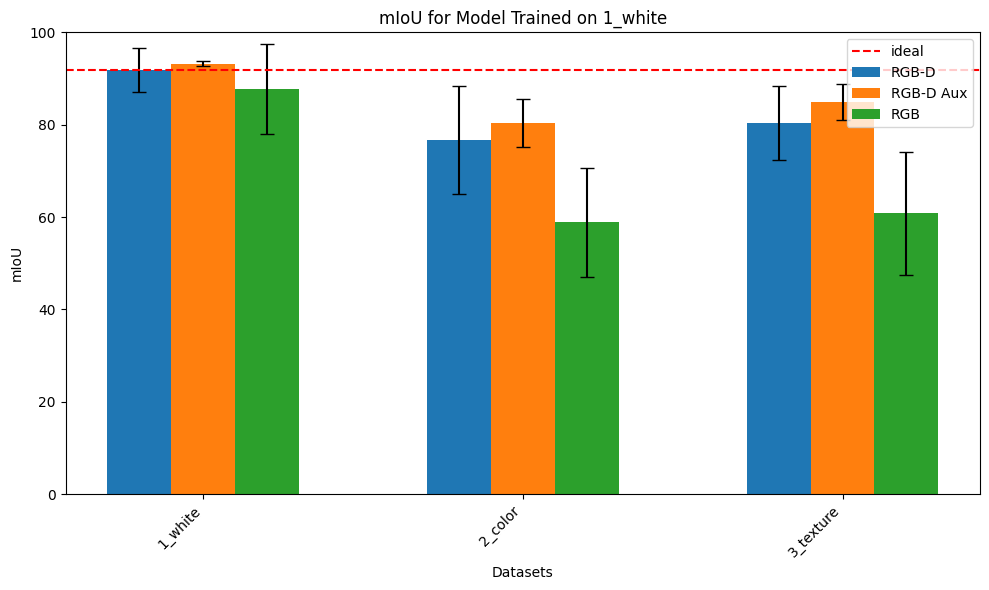

SynthDet_fgbg_2_color_large_spacing ['SynthDet_fgbg_1_white_large_spacing', 'SynthDet_fgbg_2_color_large_spacing', 'SynthDet_fgbg_3_texture_large_spacing'] RGB-D [90.5175, 91.07629999999999, 85.6451] [1.653059058231132, 1.508657353410641, 4.356912747577119]
SynthDet_fgbg_2_color_large_spacing ['SynthDet_fgbg_1_white_large_spacing', 'SynthDet_fgbg_2_color_large_spacing', 'SynthDet_fgbg_3_texture_large_spacing'] RGB-D Aux [90.5164, 91.1174, 86.564] [1.9981898408309466, 1.7223558981813227, 3.660439044704886]
SynthDet_fgbg_2_color_large_spacing ['SynthDet_fgbg_1_white_large_spacing', 'SynthDet_fgbg_2_color_large_spacing', 'SynthDet_fgbg_3_texture_large_spacing'] RGB [89.0775, 90.33133333333335, 71.05999999999999] [3.6890805878068513, 3.314777502169472, 12.741974349893082]


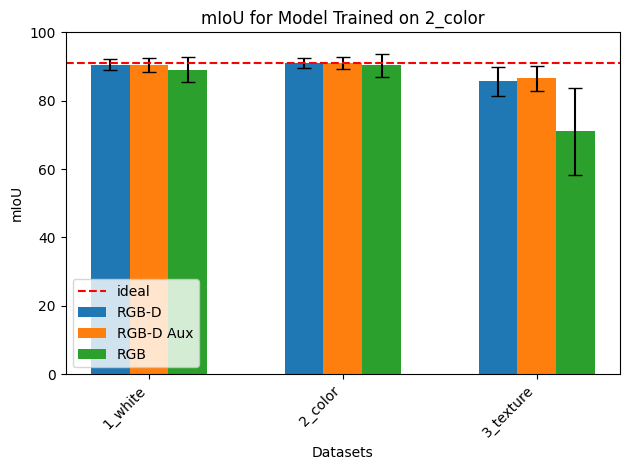

SynthDet_fgbg_3_texture_large_spacing ['SynthDet_fgbg_1_white_large_spacing', 'SynthDet_fgbg_2_color_large_spacing', 'SynthDet_fgbg_3_texture_large_spacing'] RGB-D [80.3946, 75.96000000000001, 91.5594] [8.011454414773883, 9.539337608031282, 2.0115937064924423]
SynthDet_fgbg_3_texture_large_spacing ['SynthDet_fgbg_1_white_large_spacing', 'SynthDet_fgbg_2_color_large_spacing', 'SynthDet_fgbg_3_texture_large_spacing'] RGB-D Aux [83.77380000000001, 79.6506, 93.4428] [5.1458001671265885, 7.422905889205389, 0.4884315305137451]
SynthDet_fgbg_3_texture_large_spacing ['SynthDet_fgbg_1_white_large_spacing', 'SynthDet_fgbg_2_color_large_spacing', 'SynthDet_fgbg_3_texture_large_spacing'] RGB [70.69500000000001, 64.90916666666668, 92.11716666666666] [10.952964180226891, 13.378211868764659, 2.58730551067236]


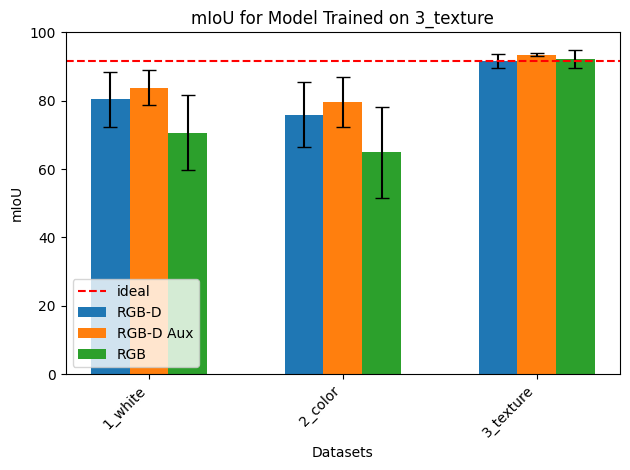

Before: 
{'RGB': [[87.71, 58.83766666666667, 60.77700000000001],
         [89.0775, 90.33133333333335, 71.05999999999999],
         [70.69500000000001, 64.90916666666668, 92.11716666666666]],
 'RGB-D': [[91.7467, 76.67949999999999, 80.42999999999999],
           [90.5175, 91.07629999999999, 85.6451],
           [80.3946, 75.96000000000001, 91.5594]],
 'RGB-D Aux': [[93.21480000000001, 80.426, 84.9836],
               [90.5164, 91.1174, 86.564],
               [83.77380000000001, 79.6506, 93.4428]]}
After: 
array([[87.55293333, 81.2386    , 85.87816667],
       [89.16833333, 83.73133333, 88.33013333],
       [82.49416667, 71.35938889, 74.65138889]])


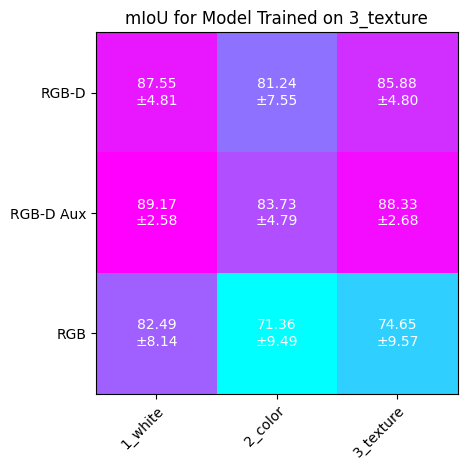

In [35]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

def parse_DFormer_input_data(data):
    models_data = {}
    
    # Split the input data into models trained
    for model_trained_data in data.split("Model trained on dataset: ")[1:]:
        if not model_trained_data:
            continue
        
        # Dataset name is the first line of the model trained data
        model_lines = model_trained_data.split("\n")
        model_name = model_lines[0].strip()
        if model_name not in models_data:
            models_data[model_name] = {}

        # Split the model trained data into the different datasets
        for testing_data in model_trained_data.split("Dataset: ")[1:]:
            if not testing_data:
                continue
            
            # Dataset name is the first line of the testing data
            dataset_lines = testing_data.split("\n")
            dataset_name = dataset_lines[0].strip()
            if dataset_name not in models_data[model_name]:
                models_data[model_name][dataset_name] = {"RGB-D": [], "RGB-D Aux": [], "RGB": []}

            # Extract the mIoU values from the testing data
            for line in dataset_lines[1:]:
                if "RGB-D Aux mIoU" in line or "RGBD_AUX mIoU" in line:
                    models_data[model_name][dataset_name]["RGB-D Aux"].append(float(re.search(r"\d+\.\d+", line).group()))
                elif "RGB-D mIoU" in line or "RGBD mIoU" in line:
                    models_data[model_name][dataset_name]["RGB-D"].append(float(re.search(r"\d+\.\d+", line).group()))
                elif "RGB mIoU" in line:
                    models_data[model_name][dataset_name]["RGB"].append(float(re.search(r"\d+\.\d+", line).group()))
    
    return models_data

def aggregate_DFormer_data(file_paths):
    aggregated_data = {}
    for file_path in file_paths:
        with open(file_path, "r") as file:
            input_data = file.read()
            model_data = parse_DFormer_input_data(input_data)
            for model, datasets in model_data.items():
                if model not in aggregated_data:
                    aggregated_data[model] = {}
                for dataset, metrics in datasets.items():
                    if dataset not in aggregated_data[model]:
                        aggregated_data[model][dataset] = {"RGB-D": [], "RGB-D Aux": [], "RGB": []}
                    for metric, values in metrics.items():
                        aggregated_data[model][dataset][metric].extend(values)
    return aggregated_data

def parse_TokenFusion_input_data(data):
    models_data = {}
    
    # Split the input data into models trained
    for model_trained_data in data.split("Model trained on dataset: ")[1:]:
        if not model_trained_data:
            continue
        
        # Dataset name is the first line of the model trained data
        model_lines = model_trained_data.split("\n")
        model_name = model_lines[0].strip()
        models_data[model_name] = {}

        # Split the model trained data into the different datasets
        for testing_data in model_trained_data.split("Dataset: "):
            if not testing_data:
                continue
            
            # Dataset name is the first line of the testing data
            dataset_lines = testing_data.split("\n")
            dataset_name = dataset_lines[0].strip()
            models_data[model_name][dataset_name] = {}

            # Extract the mIoU values from the testing data
            for line in dataset_lines[1:]:
                if "RGB-D" in line:
                    # RGB-D mIoU: [93.316, 92.097, 91.086]
                    # RGB-D is the first valueu, RGB the second and Depth the third
                    mIoU_values = re.findall(r"\d+\.\d+", line)
                    if len(mIoU_values) == 3:
                        models_data[model_name][dataset_name]["RGB-D"] = float(mIoU_values[0])
                        models_data[model_name][dataset_name]["RGB"] = float(mIoU_values[1])
                        models_data[model_name][dataset_name]["Depth"] = float(mIoU_values[2])
    
    return models_data

def aggregate_TokenFusion_data(file_paths): 
    aggregated_data = {}
    for file_path in file_paths:
        with open(file_path, "r") as file:
            input_data = file.read()
            model_data = parse_TokenFusion_input_data(input_data)
            for model, datasets in model_data.items():
                if model not in aggregated_data:
                    aggregated_data[model] = {}
                for dataset, metrics in datasets.items():
                    if dataset not in aggregated_data[model]:
                        aggregated_data[model][dataset] = {"RGB-D": [], "RGB": [], "Depth": []}
                    for metric, value in metrics.items():
                        aggregated_data[model][dataset][metric].append(value)
    return aggregated_data

def plot_data(aggregated_data, metrics=['RGB-D', 'RGB-D Aux', 'RGB'], figsize=(10, 6)):
    plt.figure(figsize=figsize)

    values_combined = {metric: [] for metric in metrics}
    errors_combined = {metric: [] for metric in metrics}
        

    for model, data in aggregated_data.items():
        datasets = list(data.keys())

        num_datasets = len(datasets)
        num_metrics = len(metrics)

        # Set up the bar width and positions
        bar_width = 0.2
        index = np.arange(num_datasets)

        max_value = 0
        for i, metric in enumerate(metrics):
            values = [np.mean(data[dataset][metric]) for dataset in datasets if metric in data[dataset]]
            errors = [np.std(data[dataset][metric]) for dataset in datasets if metric in data[dataset]]

            values_combined[metric].append(values)
            errors_combined[metric].append(errors)

            print(f"{model} {datasets} {metric} {values} {errors}")
            bar_positions = index + i * bar_width
            plt.bar(bar_positions, values, width=bar_width, yerr=errors, capsize=5, label=metric)

            # Update max_value if metric is 'RGB-D'
            if metric == 'RGB-D':
                max_value = max(max_value, max(values))

        # Add a dashed horizontal line at the highest RGB-D value
        plt.axhline(max_value, color='r', linestyle='--', label='ideal')
        
        # Adjust the x-axis to have the dataset names centered under the group of bars
        mid_positions = index + bar_width * (num_metrics - 1) / 2
        stripped_dataset_names = [dataset.split("SynthDet_fgbg_")[-1].split("_large_spacing")[0] for dataset in datasets]
        plt.xticks(mid_positions, stripped_dataset_names, rotation=45, ha='right')

        plt.ylim(0, 100)
        plt.xlabel('Datasets')
        plt.ylabel('mIoU')
        plt.title(f'mIoU for Model Trained on {model.split("SynthDet_fgbg_")[-1].split("_large_spacing")[0]}')
        plt.legend()
        plt.tight_layout()
        plt.show()

    # Create a confusion matrix for the values and errors
    import pprint
    print("Before: ")
    pprint.pprint(values_combined)

    values_combined = [np.mean(values_combined[metric], axis=0) for metric in metrics]
    errors_combined = [np.mean(errors_combined[metric], axis=0) for metric in metrics]

    # Convert lists of lists to numpy arrays for proper indexing
    values_combined = np.array(values_combined)
    errors_combined = np.array(errors_combined)

    print("After: ")
    pprint.pprint(values_combined)

    # Plot the confusion matrix
    fig, ax = plt.subplots()
    im = ax.imshow(values_combined, cmap="cool")


    # We want to show all ticks...
    ax.set_xticks(np.arange(len(datasets)))
    ax.set_yticks(np.arange(len(metrics)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(stripped_dataset_names)
    ax.set_yticklabels(metrics)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
                rotation_mode="anchor")
    
    # Loop over data dimensions and create text annotations.
    for i in range(len(metrics)):
        for j in range(len(datasets)):
            text = ax.text(j, i, f"{values_combined[i, j]:.2f}\n±{errors_combined[i, j]:.2f}",
                        ha="center", va="center", color="w")
            
    ax.set_title(f"mIoU for Model Trained on {model.split('SynthDet_fgbg_')[-1].split('_large_spacing')[0]}")
    fig.tight_layout()
    plt.show()
            

# List of input files
input_files = glob("../checkpoints_fgbg_spacing/log_*.txt")

final_files = []
for file in input_files:
    if "copy" in file:
        continue
    final_files.append(file) 
    
# Aggregate data from all input files
DFormer_aggregated_data = aggregate_DFormer_data(final_files)

input_files_CMX = glob("../checkpoints_fgbg_spacing_CMX/log_*.txt")
final_files_CMX = []
for file in input_files_CMX:
    if "copy" in file:
        continue
    final_files_CMX.append(file)

CMX_aggregated_data = aggregate_DFormer_data(final_files_CMX)

# Remove all "RGB" labels from aggregated data
for model, data in DFormer_aggregated_data.items():
    for dataset, metrics in data.items():
        metrics.pop("RGB", None)

# Remove all datasets that contain the word "white_flat"
for model, data in DFormer_aggregated_data.items():
    for dataset in list(data.keys()):
        if "white_flat" in dataset:
            data.pop(dataset, None)

# List of input files
input_files = glob("../checkpoints_fgbg_spacing_SF/log_*.txt")
final_files = []
for file in input_files:
    if "copy" in file:
        continue
    final_files.append(file) 
    
# Aggregate data from all input files
SegFormer_aggregated_data = aggregate_DFormer_data(final_files)

input_files = glob("../checkpoints_fgbg_spacing_TF/log_*.txt")
final_files = []
for file in input_files:
    if "copy" in file:
        continue
    final_files.append(file) 

TokenFusion_aggregated_data = aggregate_TokenFusion_data(final_files)

# Print the aggregated data to verify
import pprint

# Fuse the aggregated data, where RGB-D in DFormer corresponds to RGB-D in TokenFusion
aggregated_data = {}
for model, data in DFormer_aggregated_data.items():
    aggregated_data[model] = {}
    for dataset, metrics in data.items():
        aggregated_data[model][dataset] = {
            "RGB-D": metrics["RGB-D"] + TokenFusion_aggregated_data[model][dataset]["RGB-D"] + CMX_aggregated_data[model][dataset]["RGB-D"], 
            "RGB-D Aux": metrics["RGB-D Aux"], 
            "RGB": SegFormer_aggregated_data[model][dataset]["RGB"]+ TokenFusion_aggregated_data[model][dataset]["RGB"]}



# Print the aggregated data to verify
pprint.pprint(aggregated_data)

# Plot the data
plot_data(aggregated_data, metrics = ['RGB-D', 'RGB-D Aux', 'RGB'], figsize=(10, 6))	


{'SynthDet_fgbg_1_white_large_spacing': {'SynthDet_fgbg_1_white_large_spacing': {'BACKGROUND_REMOVED': [89.387,
                                                                                                        87.684,
                                                                                                        90.301],
                                                                                 'DEPTH': [12.79,
                                                                                           18.526,
                                                                                           20.436],
                                                                                 'RGBD': [93.14,
                                                                                          94.059,
                                                                                          92.507,
                                                                         

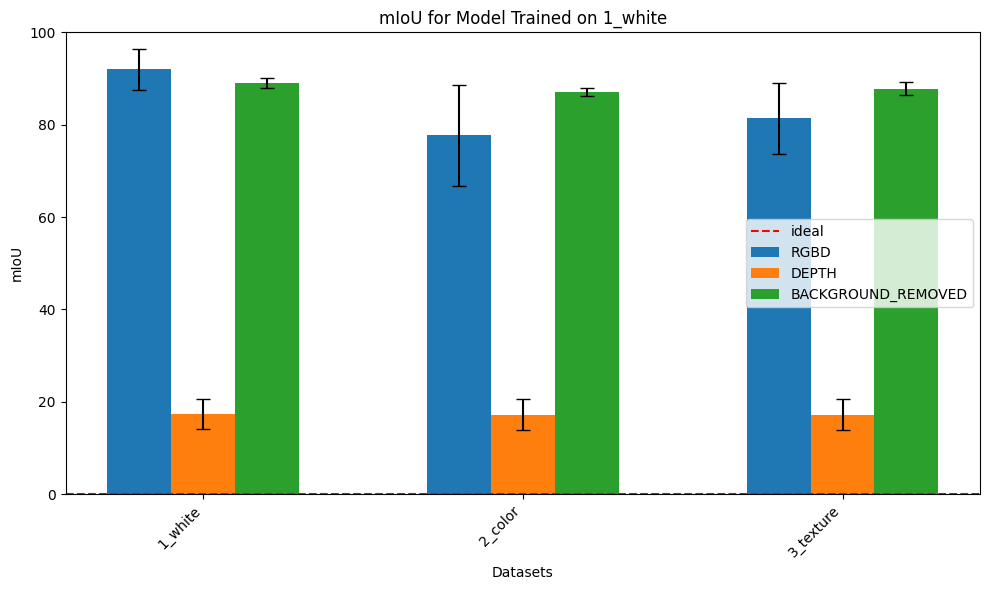

SynthDet_fgbg_2_color_large_spacing ['SynthDet_fgbg_1_white_large_spacing', 'SynthDet_fgbg_2_color_large_spacing', 'SynthDet_fgbg_3_texture_large_spacing'] RGBD [90.86208333333333, 91.38325000000002, 86.40391666666666] [1.6943657347383871, 1.5400320951742092, 4.3272847810594675]
SynthDet_fgbg_2_color_large_spacing ['SynthDet_fgbg_1_white_large_spacing', 'SynthDet_fgbg_2_color_large_spacing', 'SynthDet_fgbg_3_texture_large_spacing'] DEPTH [11.629, 11.560333333333332, 11.605000000000002] [6.146135045701485, 6.131503857583027, 6.112871720121948]
SynthDet_fgbg_2_color_large_spacing ['SynthDet_fgbg_1_white_large_spacing', 'SynthDet_fgbg_2_color_large_spacing', 'SynthDet_fgbg_3_texture_large_spacing'] BACKGROUND_REMOVED [91.75900000000001, 91.80966666666667, 91.617] [1.265841485600256, 1.2883646826716229, 1.2487884795539481]


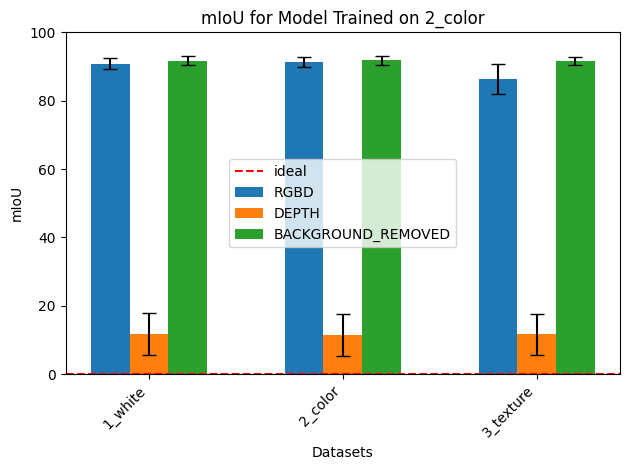

SynthDet_fgbg_3_texture_large_spacing ['SynthDet_fgbg_1_white_large_spacing', 'SynthDet_fgbg_2_color_large_spacing', 'SynthDet_fgbg_3_texture_large_spacing'] RGBD [79.50291666666665, 75.02991666666667, 91.19858333333333] [9.385463622524046, 10.78050594405115, 2.791160942998849]
SynthDet_fgbg_3_texture_large_spacing ['SynthDet_fgbg_1_white_large_spacing', 'SynthDet_fgbg_2_color_large_spacing', 'SynthDet_fgbg_3_texture_large_spacing'] DEPTH [13.972999999999999, 13.975666666666667, 13.998333333333335] [3.7382028659058437, 3.791840567440684, 3.751201170588192]
SynthDet_fgbg_3_texture_large_spacing ['SynthDet_fgbg_1_white_large_spacing', 'SynthDet_fgbg_2_color_large_spacing', 'SynthDet_fgbg_3_texture_large_spacing'] BACKGROUND_REMOVED [89.70766666666667, 89.29533333333332, 90.54433333333333] [2.4219024661524977, 2.3975974548609176, 2.4254573909997994]


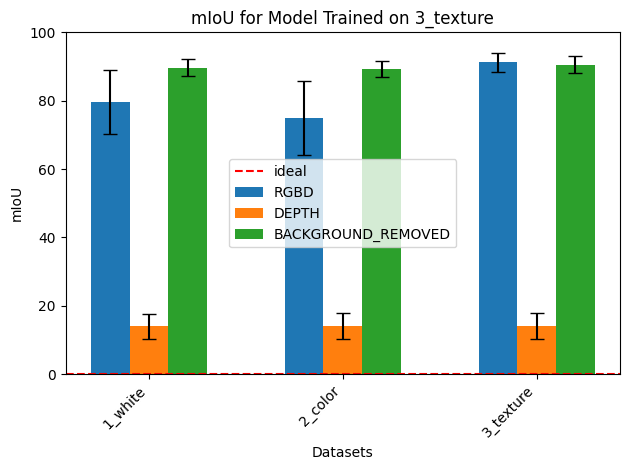

Before: 
{'BACKGROUND_REMOVED': [[89.12400000000001, 87.18366666666667, 87.755],
                        [91.75900000000001, 91.80966666666667, 91.617],
                        [89.70766666666667,
                         89.29533333333332,
                         90.54433333333333]],
 'DEPTH': [[17.250666666666664, 17.197333333333333, 17.232],
           [11.629, 11.560333333333332, 11.605000000000002],
           [13.972999999999999, 13.975666666666667, 13.998333333333335]],
 'RGBD': [[91.98191666666666, 77.76491666666668, 81.35408333333332],
          [90.86208333333333, 91.38325000000002, 86.40391666666666],
          [79.50291666666665, 75.02991666666667, 91.19858333333333]]}
After: 
array([[87.44897222, 81.39269444, 86.31886111],
       [14.28422222, 14.24444444, 14.27844444],
       [90.19688889, 89.42955556, 89.97211111]])


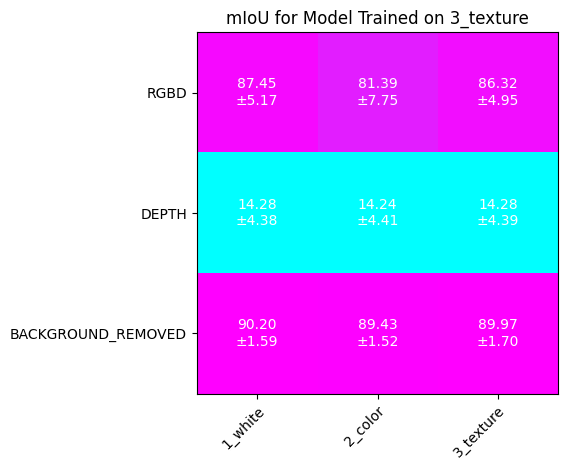

In [36]:
# G:\mscPascalBenschop\code\UsefullnessOfDepth\checkpoints_fgbg_spacing_DF

def parse_DFormer_input_data(data, data_types=["RGB-D", "DEPTH", "BACKGROUND_REMOVED"]):
    models_data = {}
    
    # Split the input data into models trained
    for model_trained_data in data.split("Model trained on dataset: ")[1:]:
        # Dataset name is the first line of the model trained data
        model_lines = model_trained_data.split("\n")
        model_name = model_lines[0].strip()
        if model_name not in models_data:
            models_data[model_name] = {}

        # Split the model trained data into the different datasets
        for testing_data in model_trained_data.split("Dataset: ")[1:]:
            # Dataset name is the first line of the testing data
            dataset_lines = testing_data.split("\n")
            dataset_name = dataset_lines[0].strip()
            if dataset_name not in models_data[model_name]:
                models_data[model_name][dataset_name] = {data_type: [] for data_type in data_types}

            # Extract the mIoU values from the testing data
            for line in dataset_lines[1:]:
                for data_type in data_types:
                    if data_type in line:
                        value = float(re.search(r"\d+\.\d+", line).group())
                        models_data[model_name][dataset_name][data_type].append(value)
    
    return models_data

def aggregate_DFormer_data(file_paths, data_types=["RGB-D", "DEPTH", "BACKGROUND_REMOVED"]):
    aggregated_data = {}
    for file_path in file_paths:
        with open(file_path, "r") as file:
            input_data = file.read()
            model_data = parse_DFormer_input_data(input_data, data_types)
            for model, datasets in model_data.items():
                if model not in aggregated_data:
                    aggregated_data[model] = {}
                for dataset, metrics in datasets.items():
                    if dataset not in aggregated_data[model]:
                        aggregated_data[model][dataset] = {data_type: [] for data_type in data_types}
                    for metric, values in metrics.items():
                        aggregated_data[model][dataset][metric].extend(values)
    return aggregated_data

input_files_bgrm = glob("../checkpoints_fgbg_spacing_DF/log_*.txt")
final_files_bgrm = []
for file in input_files_bgrm:
    if "copy" in file:
        continue
    final_files_bgrm.append(file)

DF_aggregated_data = aggregate_DFormer_data(final_files_bgrm, data_types=["RGBD", "DEPTH", "BACKGROUND_REMOVED"])

aggregated_data = {}
for model, data in DFormer_aggregated_data.items():
    aggregated_data[model] = {}
    for dataset, metrics in data.items():
        aggregated_data[model][dataset] = {
            "RGBD": metrics["RGB-D"] + DF_aggregated_data[model][dataset]["RGBD"] + CMX_aggregated_data[model][dataset]["RGB-D"] + TokenFusion_aggregated_data[model][dataset]["RGB-D"] + SegFormer_aggregated_data[model][dataset]["RGB-D"], 
            "DEPTH": DF_aggregated_data[model][dataset]["DEPTH"],
            "BACKGROUND_REMOVED": DF_aggregated_data[model][dataset]["BACKGROUND_REMOVED"],
        }


pprint.pprint(aggregated_data)

plot_data(aggregated_data, metrics=["RGBD", "DEPTH", "BACKGROUND_REMOVED"], figsize=(10, 6))	